# Using Bureau of Labor Statistics API

**References:**
- URL: https://www.bls.gov/
- Developer API: https://www.bls.gov/developers/home.htm
- Registering for the API V2: https://www.bls.gov/developers/api_faqs.htm#register3
- How to add optional parameters like the secret key to the request: https://www.bls.gov/developers/api_signature_v2.htm#parameters
- Complete list of CPI series ID: https://download.bls.gov/pub/time.series/cu/cu.series
- Complete list of national unemployment series ID: https://download.bls.gov/pub/time.series/ln/ln.series

**Popular series ID:**
- LNS14000000: National unemployment rate - seasonally adjusted
- CUSR0000SA0: All items in U.S. city average, all urban consumers, seasonally adjusted
- CUSR0000SETA: New and used motor vehicles in U.S. city average, all urban consumers, seasonally adjusted
- CUSR0000SAF: Food and beverages in U.S. city average, all urban consumers, seasonally adjusted
- CUSR0000SACL1E4: Commodities less food, energy, and used cars and trucks in U.S. city average, all urban consumers, seasonally adjusted
- CUSR0000SACE: Energy commodities in U.S. city average, all urban consumers, seasonally adjusted
- CUSR0000SS47014: Gasoline, unleaded regular in U.S. city average, all urban consumers, seasonally adjusted

In [17]:
from datetime import date
from pathlib import Path
import configparser
import matplotlib.pyplot as plt
import pandas as pd
import requests
import json

In [18]:
config = configparser.ConfigParser()
config.read(Path.home() / '.config' / 'config.ini')
bls_key = config['bls']['secretkey']

In [28]:
def plot_series_id(series_id: str, series_descr: str, bls_key: str):
    """
    A function that plots a BLS series

    Parameters
    ----------
    series_id : str
        Series ID
    series_descr : str
        Series description
    bls_key : str
        BLS secret key

    Returns
    -------
    A MATPLOTLIB line chart with vertical regions or bars to indicate when recessions have occurred to add historical context
    """
    
    try:
        current_year = date.today().year
        start_year = current_year - 19

        headers = {'Content-type': 'application/json'}
        data = json.dumps(
            {
                "seriesid": [series_id],
                "startyear": str(start_year), 
                "endyear": str(current_year),
                "registrationkey": bls_key
            }
        )
        p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
        p.raise_for_status()  # Raise an exception for HTTP errors
        json_data = json.loads(p.text)
        
        df_list = []
        for series in json_data['Results']['series']:
            df = pd.DataFrame.from_dict(series['data'])
            # Transformations:
            # Create series_id column
            # Filter to just periods M01, M02, ..., M12
            # Create year-month column as date data type
            # Cast value column as float data type
            # Keep only series_id, year_month, and value columns
            df = (
                df
                .assign(series_id=series['seriesID'])
                .query("(period >= 'M01') & (period <= 'M12')")
                .assign(year_month=pd.to_datetime(
                    df['year'].astype('str')+'-'+df['period'].str[-2:], format='%Y-%m')
                )
                .assign(value=df['value'].astype('float'))
            )[['series_id','year_month','value']]
            df_list.append(df)

        df_final = pd.concat(df_list, axis='columns')

        fig, ax = plt.subplots(figsize=(8, 5))
        sns.lineplot(
            data=df_final,
            x='year_month',
            y='value',
            ax=ax,
        )
        # Create transparent vertical regions that indicate when recessions happened
        # https://en.wikipedia.org/wiki/List_of_recessions_in_the_United_States
        ax.fill_between(x=['2001-03-01', '2001-11-01'], y1=[int(df_final['value'].max()) + 1, int(df_final['value'].max()) + 1], alpha=0.2, color='gray')
        ax.fill_between(x=['2007-12-01', '2009-06-01'], y1=[int(df_final['value'].max()) + 1, int(df_final['value'].max()) + 1], alpha=0.2, color='gray')
        ax.fill_between(x=['2020-02-01', '2020-04-01'], y1=[int(df_final['value'].max()) + 1, int(df_final['value'].max()) + 1], alpha=0.2, color='gray')
        ax.fill_between(x=['2023-01-01', '2023-08-01'], y1=[int(df_final['value'].max()) + 1, int(df_final['value'].max()) + 1], alpha=0.2, color='blue')
        ax.set_ylim(int(df_final['value'].min()) - 1, int(df_final['value'].max()) + 1)
        ax.spines[['right', 'top']].set_visible(False)
        plt.xlabel('Year')
        plt.ylabel('Value')
        plt.suptitle(series_descr)
        plt.title("grey=recession / blue=current year", fontsize=10)
        plt.tight_layout()
        plt.show()
    except requests.exceptions.RequestException as e:
        print("An error occurred during the HTTP request:", e)
    except (ValueError, KeyError) as e:
        print("An error occurred while processing the data:", e)

#### National Unemployment Rate

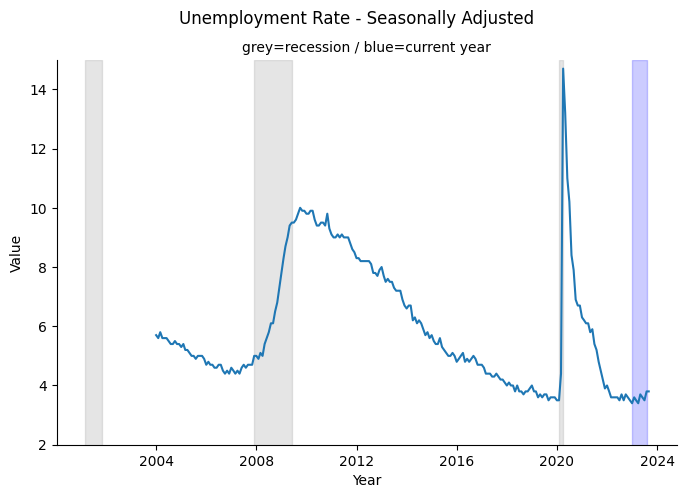

In [25]:
plot_series_id(
    series_id='LNS14000000',
    series_descr='Unemployment Rate - Seasonally Adjusted',
    bls_key=bls_key
)

#### CPI - All Items Seasonally Adjusted

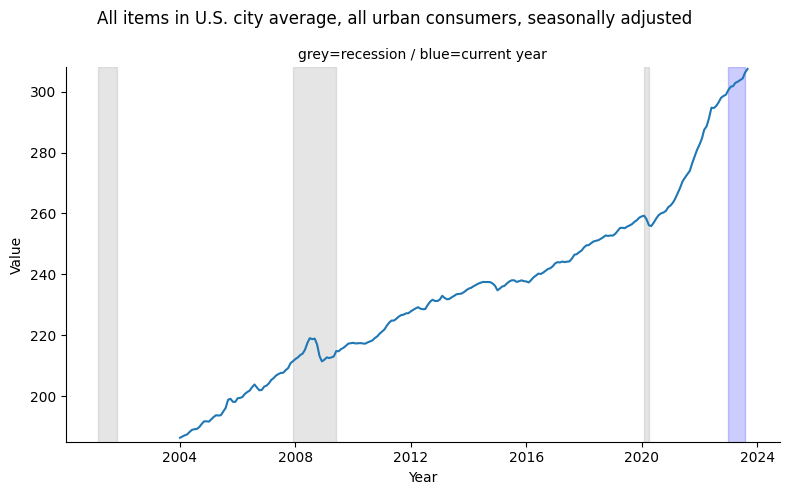

In [30]:
plot_series_id(
    series_id='CUSR0000SA0',
    series_descr='All items in U.S. city average, all urban consumers, seasonally adjusted',
    bls_key=bls_key
)

#### CPI for New and used motor vehicles in U.S. city average, all urban consumers, seasonally adjusted

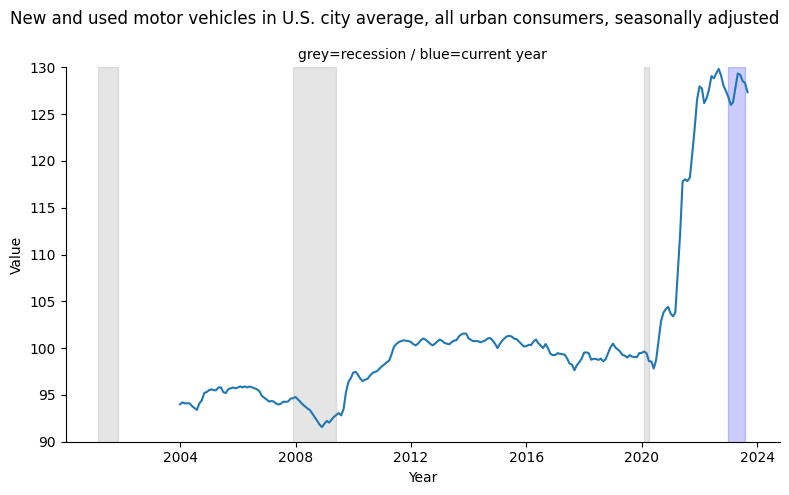

In [29]:
plot_series_id(
    series_id='CUSR0000SETA',
    series_descr='New and used motor vehicles in U.S. city average, all urban consumers, seasonally adjusted',
    bls_key=bls_key
)

#### CPI for Food and beverages in U.S. city average, all urban consumers, seasonally adjusted

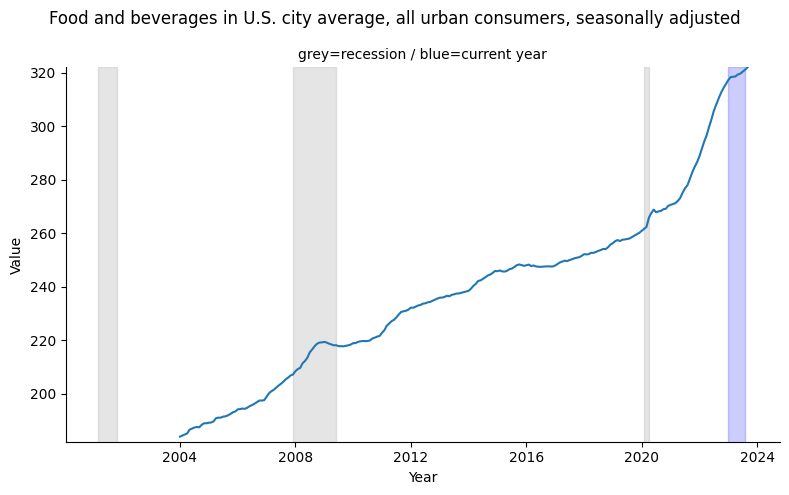

In [31]:
plot_series_id(
    series_id='CUSR0000SAF',
    series_descr='Food and beverages in U.S. city average, all urban consumers, seasonally adjusted',
    bls_key=bls_key
)

#### CPI for Commodities less food, energy, and used cars and trucks in U.S. city average, all urban consumers, seasonally adjusted

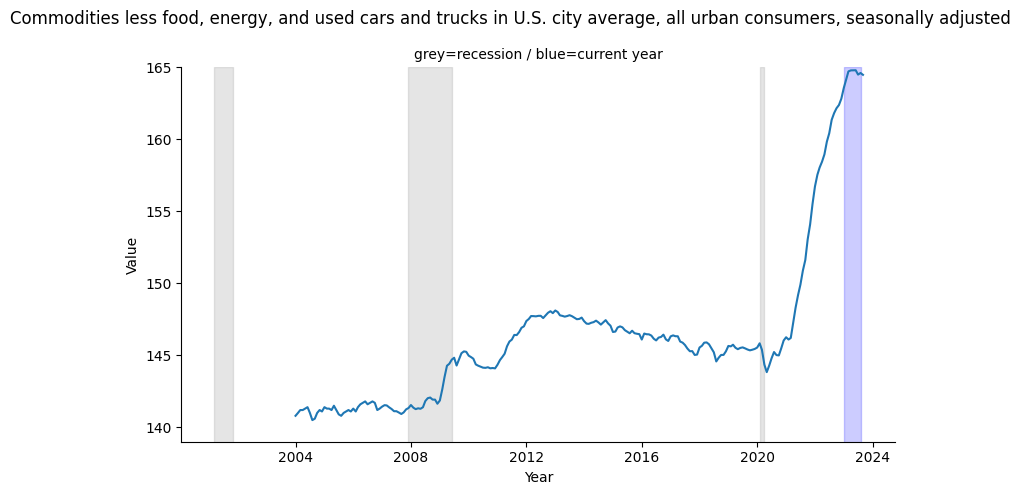

In [33]:
plot_series_id(
    series_id='CUSR0000SACL1E4',
    series_descr='Commodities less food, energy, and used cars and trucks in U.S. city average, all urban consumers, seasonally adjusted',
    bls_key=bls_key
)

Examples of commodities less food and beverages in the context of the U.S. city average, all urban consumers, seasonally adjusted, can include:

- Clothing: This category encompasses clothing and apparel items such as shirts, pants, dresses, shoes, and accessories.
- Electronics: This category includes products like televisions, computers, smartphones, and other electronic gadgets.
- Furniture: This category comprises items like sofas, chairs, tables, and other home furnishings.
- Household goods: This can include products like cleaning supplies, kitchenware, and various household items.
- Personal care products: Items such as toiletries, cosmetics, and personal hygiene products fall under this category.
- Appliances: This includes large and small appliances like refrigerators, washing machines, and microwaves.
- Tools and equipment: Items for home improvement, gardening, and various tools would be in this category.
- Office supplies: Products like paper, pens, and office equipment.
- Home decor: Items like curtains, rugs, and decorative items for the home.
- Pet supplies: Products for pet care, such as pet food, toys, and accessories.

#### CPI for Energy commodities in U.S. city average, all urban consumers, seasonally adjusted

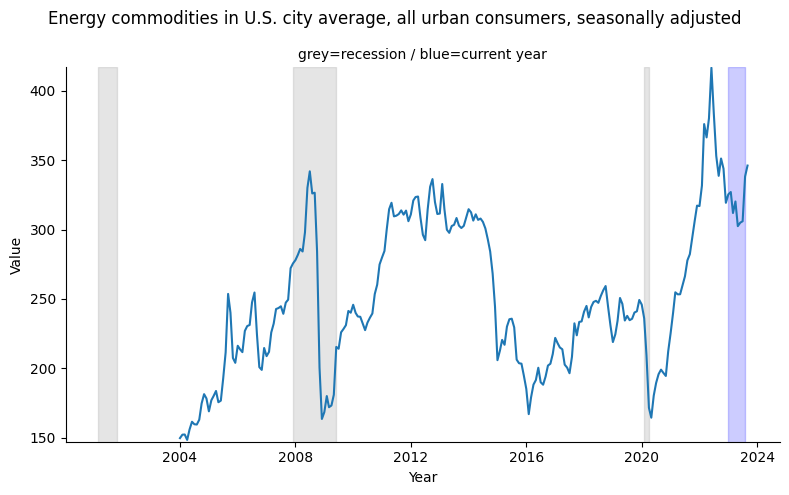

In [34]:
plot_series_id(
    series_id='CUSR0000SACE',
    series_descr='Energy commodities in U.S. city average, all urban consumers, seasonally adjusted',
    bls_key=bls_key
)

#### CPI for Gasoline, unleaded regular in U.S. city average, all urban consumers, seasonally adjusted

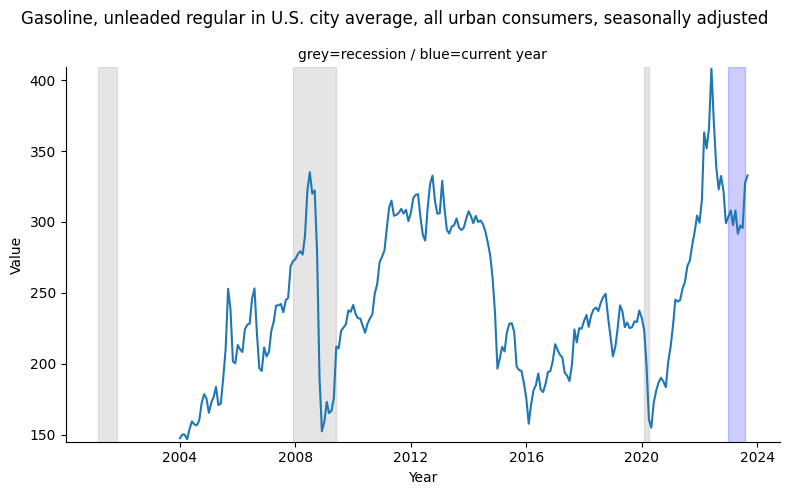

In [35]:
plot_series_id(
    series_id='CUSR0000SS47014',
    series_descr='Gasoline, unleaded regular in U.S. city average, all urban consumers, seasonally adjusted',
    bls_key=bls_key
)